In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# <center> Notes on root finding </center>

There isn't much I can add to physical applications of numerical root finding without exponentially increasing the complexity of the application. In the notes involving matrix inverses and eigenvalue problems, we had dealt with linear differential equations. These are a special set of differential equations where if $\phi(x)$ satisifes the differential equation, so would $A \phi(x)$ for any non-zero constant $A$.

Consider for example the pseudo-spectral method. The algebraic equations that results from applying the method on the Schrodinger equation are always linear algebraic equations on the set of unknown coefficients $c_n$, which may be translated into a problem involving matrices. There are no square or cubic terms involving $c_n$ anywhere! 

You can no longer rely on matrix methods alone when the differential equation is non-linear. The problem now becomes a multi-dimensional set of root finding problems. 'Multi-dimensional', since there are $N$ variables $c_n$ which we may vary. 'Set', since there are $N$ such equations.

The root finding algorithms found in the text, such as relaxation, Newton-Raphson and the secant methods, and gradient descent, has its generalizations to such problems. There are many subtleties that one must avoid, introduced by multi-dimensionality and the multiplicity of the algebraic equations that must be satisfied.

Even a very basic application of root finding on things other than pure algebraic equations would take several lecture notes. We shall instead try to generate the fractal in 3blue1brown's video by calculating the basins of attraction of a cubic polynomial on the complex plane

## <center> Description of the algorithm </center>

The first step is to ask the user for three inputs, representing the three roots of a cubic polynomial on the complex plane,
\begin{equation}
f(z) = (z - z_0)(z-z_1)(z-z_2)
\end{equation}
It's derivative is
\begin{equation}
f'(z) = (z-z_1)(z-z_2) + (z - z_0)(z-z_2) + (z - z_0)(z-z_1)
\end{equation}
Then we ask the user two points. This serves as the upper-left and lower-right corners of a box on the complex plane from which we are going to choose initial guesses from.

The algorithm then iterates the Newton-Raphson method on each point of an equally-spaced mesh on the complex plane. If it reaches $z_0$ to within a distance $\epsilon$, we give the initial point a value of 0. If it reaches $z_1$ to within a distance $\epsilon$, we give the initial point a value of 1. If it reaches $z_2$ to within a distance $\epsilon$, we give the initial point a value of 2. If it failed to reach any of the zeros, we shall give the initial point a value of 3.

In [2]:
def NewtonRaphson(z, f, fdot, epsilon = 1E-6, max_iter = 1_000):
    """
    Calculates the zeros of f, whose derivative fdot is known, starting with an initial guess z.
    
    The iteration stops either when the updated z, stored in z_new, is within a distance epsilon to z,
    or when the iteration has undergone max_iter number of steps
    """
    for _ in range(max_iter):
        if fdot(z) == 0:
            print('Division by zero occured')
            return None
        z_new = z - f(z)/fdot(z)
        if abs(z - z_new) < epsilon:
            return z_new
        z = z_new
    print('Max iterations reached')
    return z

def fractal_NR(roots, z_corner_UL, z_corner_LR, N, epsilon = 1E-3, max_iter = 1E3):
    def f(z):
        return (z - roots[0])*(z - roots[1])*(z-roots[2])
    def fdot(z):
        return (z - roots[1])*(z-roots[2]) + (z - roots[0])*(z-roots[2]) \
                + (z - roots[0])*(z - roots[1])
    z_reals = np.linspace(np.real(z_corner_UL), np.real(z_corner_LR), N)
    z_imags = np.linspace(np.imag(z_corner_LR), np.imag(z_corner_UL), N)
    
    image = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            z = z_reals[i] + z_imags[j] * 1j ## get a complex number z on the given box on the complex plane
            z_root = NewtonRaphson(z, f, fdot, epsilon = epsilon)
            for root in roots:
                ## check which root this is. If it isn't the zeroth root, it adds 1 to the initial point on the image
                ## If it isn't the first root, it adds 1 to the initial point again.
                ## and so forth
                if abs(z_root - root) > epsilon:
                    image[i,j] += 1
                else:
                    break
                    
    return image

In [3]:
roots = [-1,1j,1]
z_corner_UL = -1 + 1j
z_corner_LR = 1 - 1j
N = 1000

image = fractal_NR(roots, z_corner_UL, z_corner_LR, N)

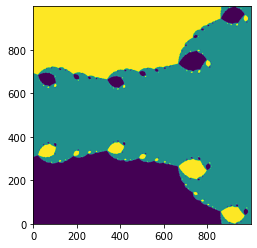

In [4]:
plt.imshow(image, origin = 'lower')

In [5]:
plt.imsave('test.pdf', image, origin='lower')

In [6]:
roots = [1, - 1/2 + - 1j * np.sqrt(3)/2,- 1/2 + 1j * np.sqrt(3)/2]
z_corner_UL = -2 + 2j
z_corner_LR = 2 - 2j
N = 1000

image = fractal_NR(roots, z_corner_UL, z_corner_LR, N)

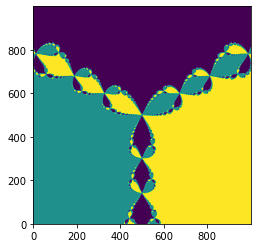

In [7]:
plt.imshow(image, origin = 'lower')

In [8]:
plt.imsave('test2.png', image, origin='lower')